In [296]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter

Importing .csv files for parsing.

In [297]:
dfiiu = pd.read_csv('internet_income_urban.csv')
df2 = pd.read_csv('share_of_individuals_using_the_internet.csv')
df3 = pd.read_csv('mobile_cellular_subscriptions_per_100_people.csv')

# Working on sorting and analyzing the data in our first dataframe.

Cleaning data by eliminating rows with null values in any of the columns.

In [298]:
dfiiu_clean = dfiiu.dropna(subset=['incomeperperson'])
dfiiu_clean2 = dfiiu_clean.dropna(subset=['internetuserate'])
dfiiu_clean3 = dfiiu_clean2.dropna(subset=['urbanrate'])

Placing country and internet user rate columns into a dataframe and selecting top 10 based on internet user rate (data analysis). We will then graph this and look to see if there are any observables similarities in countries listed to our first graph.

In [299]:
countryinternet = dfiiu_clean3[['country', 'internetuserate']]
dfinternetlargest = countryinternet.nlargest(10, 'internetuserate')

Plotting the top 10 countries with highest percentage of internet users.

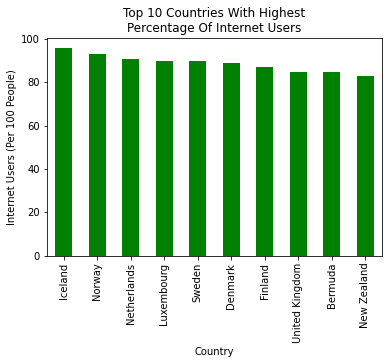

In [302]:
dfinternetlargest.plot(x = 'country', y = 'internetuserate', color='green', kind="bar", legend = False)
ax = plt.gca()
ax.set_xlabel('Country')
ax.set_ylabel('Internet Users (Per 100 People)')


plt.title('Top 10 Countries With Highest\nPercentage Of Internet Users')
plt.show()

Placing country and income columns into a dataframe and selecting top 10 based on income (data analysis)

In [305]:
countryincome = dfiiu_clean3[['country', 'incomeperperson']]
dfincomelargest = countryincome.nlargest(10, 'incomeperperson')

Plotting the top 10 countries with highest income per person.

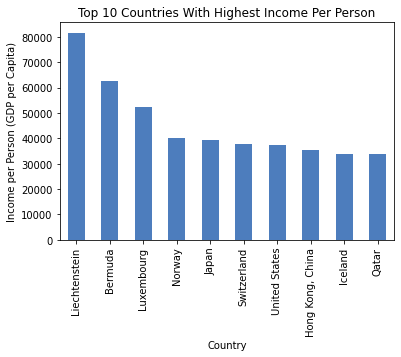

In [306]:
dfincomelargest.plot(x = 'country', y = 'incomeperperson', color='#4d7dbd', kind="bar", legend = False)
ax = plt.gca()
ax.set_xlabel('Country')
ax.set_ylabel('Income per Person (GDP per Capita)')


plt.title('Top 10 Countries With Highest Income Per Person')
plt.show()

We observe that countries such as Norway, Luxembourg and others appear on both graphs. Is there high correlation between income per person and percentage of internet users within a country?

Below, I placed country and urban rate columns into a dataframe and selected the top 10 based on urban rate (data analysis). I then graphed this and looked to see if there were any observables similarities in countries listed in the first and second graphs.

In [307]:
countryur = dfiiu_clean3[['country', 'urbanrate']]
dfurlargest = countryur.nlargest(10, 'urbanrate')

Plotting the top 10 countries with highest urban population by percentage of total population.

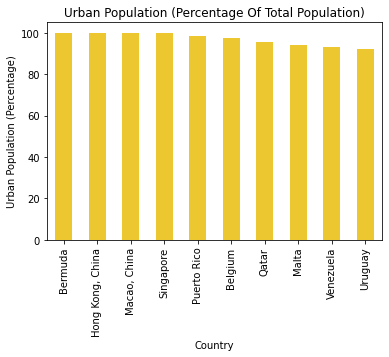

In [308]:
dfurlargest.plot(x = 'country', y = 'urbanrate', color='#edc72f', kind="bar", legend = False)
ax = plt.gca()
ax.set_xlabel('Country')
ax.set_ylabel('Urban Population (Percentage)')


plt.title('Urban Population (Percentage Of Total Population)')
plt.show()

We do not observe many similarities in terms of countries listed as compared to our first and second graphs. Our next step will be to turn each of the columns in the dataframe into individual series to run correlation (data analysis) on them to better pin-point whether higher income or higher urban rate is a better indicator of a country's internet user rate. 

In [309]:
col1 = dfiiu_clean3['incomeperperson']
col2 = dfiiu_clean3['internetuserate']
col3 = dfiiu_clean3['urbanrate']

This is the correlation between income per person and internet user rate.

In [310]:
col1.corr(col2)

0.7507274332868664

This is the correlation between urban rate and internet user rate.

In [311]:
col2.corr(col3)

0.6244640029491871

We can observe that income per person is more highly correlated with internet user rate than urban rate is. As an application for this information, if someone wanted to increase internet user rate in a given country, working to increase the average income per person may assist in accomplishing that goal more than moving people into urban areas (to circumvent possible internet infrastructure deficiencies). 

# Working on sorting and analyzing the data in our second dataframe.

Note: Data has no null values that I saw but still cleaned just in case.

In [312]:
df2_clean = df2.dropna(subset=['Individuals using the Internet (% of population)'])

In [313]:
df2_clean['Year'] = df2_clean['Year'].astype(str)

Here, we are selecting two columns from the dataset and grouping them by year in order to find the global average per year.

In [314]:
df2sort = df2_clean[['Year', 'Individuals using the Internet (% of population)']]
df2grp = df2sort.groupby('Year')
yearmean = df2grp['Individuals using the Internet (% of population)'].mean()

I will use the yearly global averages to track increase in internet users over time. It is plotted below. 

Note: Gridlines and minor ticks added to more easily visualize data. 

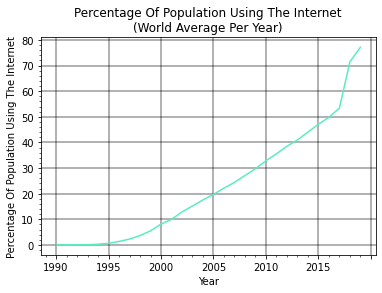

In [315]:
yearmean.plot(color='#58edc0', kind="line")
ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Percentage Of Population Using The Internet')
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.grid(axis="x", color="black", alpha=.3, linewidth=2)
ax.grid(axis="y", color="black", alpha=.3, linewidth=2)


plt.title('Percentage Of Population Using The Internet\n(World Average Per Year)')
plt.show()

# Working on sorting and analyzing the data in our third dataframe.

Note: Data has no null values that I saw but still cleaned just in case.

In [316]:
df3_clean = df3.dropna(subset=['Mobile cellular subscriptions (per 100 people)'])
df3_clean['Year'] = df3_clean['Year'].astype(str)

I selected two columns from the dataset and grouped them by year in order to find the global average per year for mobile cellular subscribers. The original data set starts at year 1960 and has several decades of values of zero that I felt were unneccessary to show on the graph so they have been omitted from our dataframe. We will start at 1990. 

In [317]:
df3sort = df3_clean[['Year', 'Mobile cellular subscriptions (per 100 people)']]
df3sortnew = df3sort[df3sort['Year'] >= '1990']
df3grp = df3sortnew.groupby('Year')
mobilemean = df3grp['Mobile cellular subscriptions (per 100 people)'].mean()

I used the yearly global averages to track increase in mobile subscribers over time. It is plotted below. 

Note: Gridlines and minor ticks added to more easily visualize data. Also, a value in excess of 100 signifies users having more than one mobile subscription, on average.

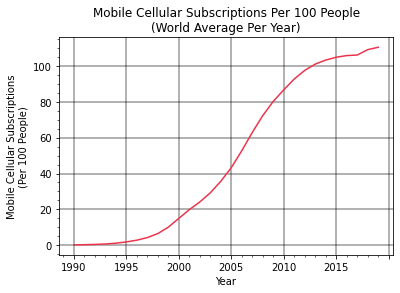

In [318]:
mobilemean.plot(color='#eb344c', kind="line")
ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Mobile Cellular Subscriptions\n(Per 100 People)')
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.grid(axis="x", color="black", alpha=.3, linewidth=2)
ax.grid(axis="y", color="black", alpha=.3, linewidth=2)


plt.title('Mobile Cellular Subscriptions Per 100 People\n(World Average Per Year)')
plt.show()